# Research track 2 (assignment2)  


We start from the first assignment, in particular from the package developed using actions. 
The "user interface" node has been replaced by jupyter + matplotlib. Through these we can the action or adjust the speed by publishing to cmd_vel. The second part also includes the implementation of matplotlib to display graphs representing various information about the simulation. 



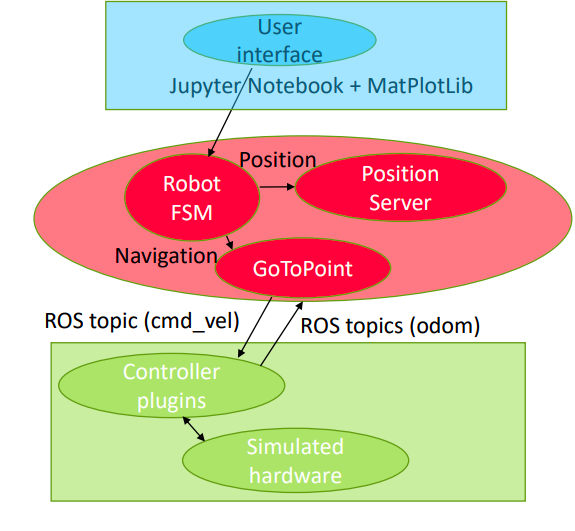 
### how to work: 

1. Download the package from: https://github.com/Imdimark/rt2/tree/action and follow the readme in order to build and launch the package.
2. Launch Jupyter notebook, there are 2 option:
2. ee
3. Run all cell of this Jupyter notebook.


In [1]:


%matplotlib widget

import actionlib
import actionlib.msg
import rt2_assignment1.msg

from IPython.display import display
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox
import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
import rospy
import math
import timeit
from nav_msgs.msg import Odometry
from matplotlib import animation, rc
from geometry_msgs.msg import Twist
import ipywidgets as widgets
from rt2_assignment1.srv import Command
from rt2_assignment1.msg import PlanningActionResult
rospy.init_node('user_interface')
client = actionlib.SimpleActionServer('/reaching_goal', rt2_assignment1.msg.PlanningAction,auto_start=False)
times = list()
actual_time = list()
ui_client = rospy.ServiceProxy('/user_interface', Command)
pub = rospy.Publisher('cmd_vel', Twist, queue_size=10)
pub1 = rospy.Publisher('odom', Odometry, queue_size = 10)
odom = Odometry()
msg = Twist()
reached = 0
cancelled = 0
msg.linear.x = 0
msg.linear.y = 0 
msg.linear.z = 0
initial_time = timeit.timeit()
ris_odom_ang = list()
ris_ang = list()
ris_lin = list()
ris_odom_lin = list()
x_data = list()
y_data = list()

In [2]:
print("\nPress 1 to start the robot, 0 to stop the robot ")

button = widgets.Button(description="Start!")
output = widgets.Output()
display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked(b):
    with output:
        ui_client("start")
        starting_goal_time = timeit.timeit()
button.on_click(on_button_clicked)

button = widgets.Button(description="Stop!")
output = widgets.Output()
display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked(b):
    global cancelled
    with output:
        ui_client("stop")
        cancelled = cancelled + 1
        print(cancelled)
button.on_click(on_button_clicked)





Press 1 to start the robot, 0 to stop the robot 


Button(description='Start!', style=ButtonStyle())

Output()

Button(description='Stop!', style=ButtonStyle())

Output()

In [3]:

a = widgets.FloatSlider(min=-1.0, max=1.0)
display(a)

b = widgets.FloatSlider(min=-1.0, max=1.0)
display(b)


def on_value_change(change):
    global msg
    msg.linear.x = change['new']
    pub.publish(msg)
    
def on_valueang_change(change):
    global msg
    msg.angular.z = change['new']
    pub.publish(msg)

a.observe(on_value_change, names='value')
b.observe(on_valueang_change, names='value')

FloatSlider(value=0.0, max=1.0, min=-1.0)

FloatSlider(value=0.0, max=1.0, min=-1.0)

In [4]:
button1 = widgets.Button(description="^", layout=Layout(width='auto', grid_area='button1'))
output = widgets.Output()
#display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked1(b):
    with output:
        #msg.linear.x =
        
        odom.pose.pose.position.x = 5
        pub1.publish(odom)
        
        
        ############msg.linear.Y = 3
        #msg.linear.z =
        #############pub.publish(msg)
        #ui_client("start")
button1.on_click(on_button_clicked1)

button2 = widgets.Button(description="<", layout=Layout(width='auto', grid_area='button2'))
output = widgets.Output()
#display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked2(b):
    with output:
        msg.linear.x = -1
        #msg.linear.y = 
        #msg.linear.z =
        pub.publish(msg)
button2.on_click(on_button_clicked2)

button3 = widgets.Button(description=">", layout=Layout(width='auto', grid_area='button3'))
output = widgets.Output()
#display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked3(b):
    with output:
        msg.linear.x = 1
        #msg.linear.y =
        #msg.linear.z =
        pub.publish(msg)
button3.on_click(on_button_clicked3)

button4 = widgets.Button(description="STOP", layout=Layout(width='auto', grid_area='button4'))
output = widgets.Output()
#display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked4(b):
    with output:
        msg.linear.x = 0
        msg.linear.y = 0
        msg.linear.z = 0
        msg.angular.z = 0
        pub.publish(msg)
button4.on_click(on_button_clicked4)

button5 = widgets.Button(description="v", layout=Layout(width='auto', grid_area='button5'))
output = widgets.Output()
#display(button, output)
#handle changes, the observe method of the widget can be used to register a callback.
def on_button_clicked5(b):
    with output:
        #msg.linear.x = 0
        msg.angular.z = -3 
        #msg.linear.z = 
        pub.publish(msg)
button5.on_click(on_button_clicked5)

widgets.GridBox(children=[button1, button2, button3, button4 ,button5],
                layout=widgets.Layout(width='80%',grid_template_rows='auto auto auto',
                grid_template_columns='16% 16% 16% 16% 16% 16% ',
                grid_template_areas= '''". button1 . "". button4 .""button2 button5 button3"''')
               )



GridBox(children=(Button(description='^', layout=Layout(grid_area='button1', width='auto'), style=ButtonStyle(…

In [5]:

def odom_callback(msg):
    global ris_odom_ang, ris_odom_lin, x_data, y_data
    global actual_time
    y_data.append(msg.pose.pose.position.y)
    x_data.append(msg.pose.pose.position.x)
    #z_data.append(msg.pose.pose.orientation.z)
    ris_odom_ang.append(msg.twist.twist.angular.z)
    ris_odom_lin.append(math.sqrt((pow(msg.twist.twist.linear.x,2))+ (pow(msg.twist.twist.linear.y,2))))
    
    actual_time.append(timeit.timeit() - initial_time)
    
sub_odom = rospy.Subscriber('/odom', Odometry, odom_callback)

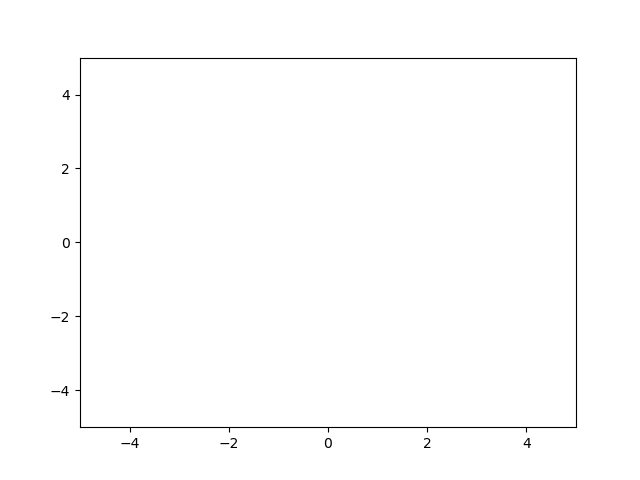

In [6]:
# an xy graph showing the robot’s position
fig5, ax5 = plt.subplots()

ax5.set_xlim(( -5, 5))
ax5.set_ylim((-5, 5))

line5, = ax5.plot([], [], 'ro')
x_data=[]
y_data=[]

#quiver([2, 2], 1, 1,)

def init5():
    line5.set_data([], [])
    return (line5,)  
def animate5(i):
    line5.set_data(x_data, y_data)
    return (line5)
anim5 = animation.FuncAnimation(fig5, animate5, init_func=init5,
                               frames=100, interval=20, blit=True)

In [7]:
def clbkReached(msg):
    global reached
    global times
    global starting_goal_time
    global time 
    reached = reached + 1
    time = timeit.timeit() - starting_goal_time
    times.append(time)
    print (time)
sub_reached = rospy.Subscriber('/reaching_goal/result',PlanningActionResult, clbkReached)

Text(0.5, 1.0, ' number of reached targets and cancelled targets')

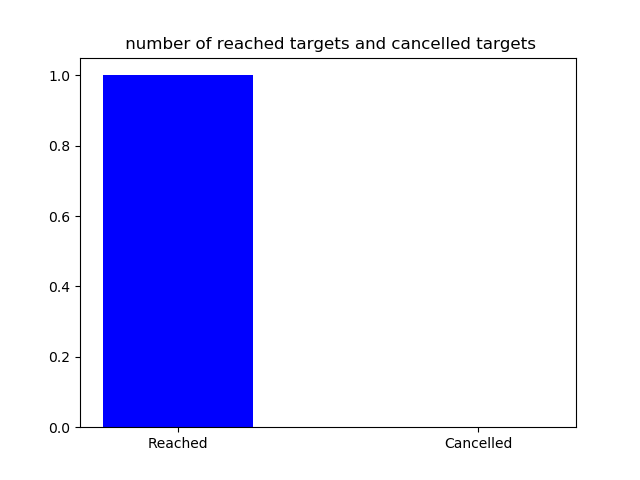

In [12]:
# bar plot displaying the number of reached targets and cancelled targets
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
fig,ax1= plt.subplots()
height1 = (reached,cancelled)
x1 = np.array(['Reached','Cancelled'])
bar=ax1.bar(x1,height1,width=0.5,color='b')
ax1.set_title(' number of reached targets and cancelled targets')

Text(0.5, 1.0, 'time required to reach targets')

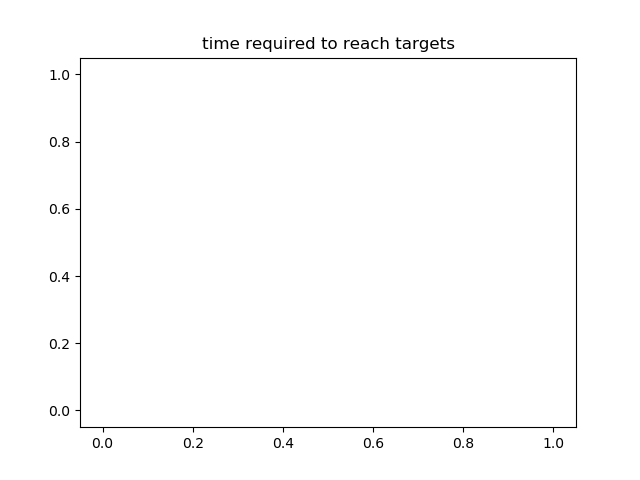

In [14]:
# hist plot showing the time required to reach targets

#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
f1,axis1= plt.subplots()
x = len(times)
bar1=axis1.bar(x,times,width=0.5,color='r')
axis1.set_title('time required to reach targets')

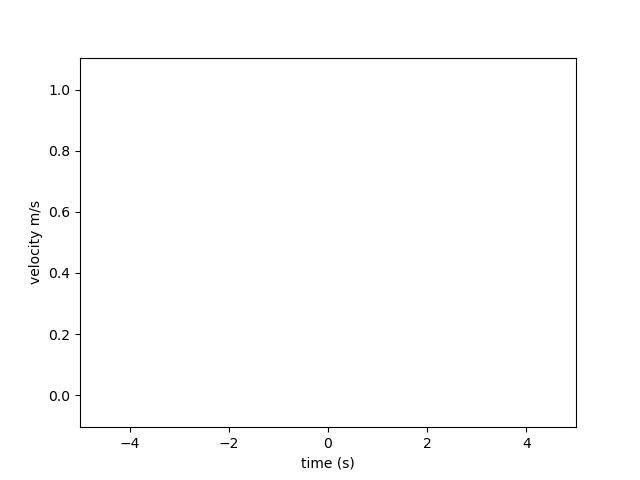

In [10]:
#a line plot for visualizing cmd_vel vs. actual velocity (for linear and angular velocity)
fig1, ax1 = plt.subplots()
ax1.set_xlim(( -5, 5))
line1, = ax1.plot([], [], 'ro')
line2, = ax1.plot([], [], 'ro')
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('velocity m/s')
###########from cmd vel
ris_lin.append(math.sqrt((pow(msg.linear.x,2))+ (pow(msg.linear.y,2)))) #calculates the resultant of the velocity
###########from odom
def init1():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2)

def animate1(i):
    line1.set_data(actual_time, ris_lin)
    line2.set_data(actual_time, ris_odom_lin )
    return (line1, line2)
anim1 = animation.FuncAnimation(fig1, animate1, init_func=init1,
                               frames=100, interval=20, blit=True)

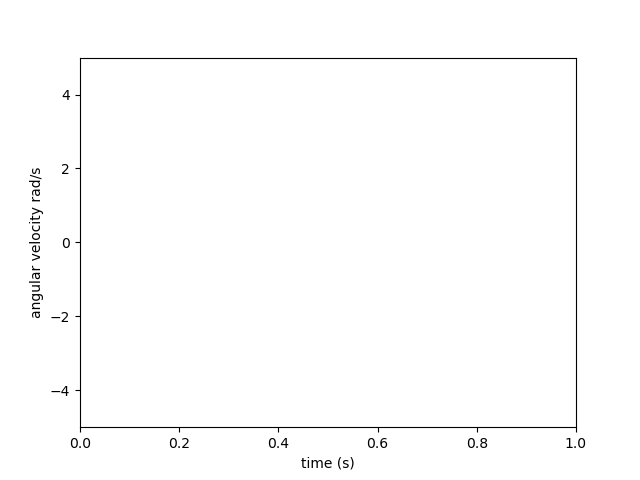

In [11]:
#a line plot for visualizing cmd_vel vs. actual velocity (for linear and angular velocity)
fig2, ax2 = plt.subplots()
ax2.set_ylim((-5, 5))
line3, = ax1.plot([], [], 'ro')
line4, = ax1.plot([], [], 'ro')
ax2.set_xlabel('time (s)') 
ax2.set_ylabel('angular velocity rad/s')


###########cmdvel
ris_ang.append(msg.angular.z)
###########from odom


def init2():
    line3.set_data([], [])
    line4.set_data([], [])
    return (line3, line4)

def animate2(i):
    line3.set_data(actual_time, ris_ang )
    line4.set_data(actual_time, ris_odom_ang )
    return (line3, line4)

anim2 = animation.FuncAnimation(fig2, animate2, init_func=init2,
                               frames=100, interval=20, blit=True)



## risvolti futuri:
* conteggiare tra i goal cancellati anche quelli che vengono terminati da cli
* migliorare label e titoli